# Consolidation across Portfolios

## Notebook Initialization

In [3]:
import pandas as pd
from pathlib import Path
from datetime import datetime, date
import matplotlib.ticker as mticker

## Retrieve and Prepare Cumulative Returns Data

In [4]:
crypto_df = pd.read_csv(Path('../data/cum_returns_cryptocurrency.csv'))
crypto_df.columns = ['time', 'cryptocurrency']
crypto_df['time'] = pd.to_datetime(crypto_df['time'],utc=None)
crypto_df['time'] = crypto_df['time'].map(lambda ts: ts.strftime('%Y-%m-%d'))
crypto_df.set_index('time')
crypto_df

,time,cryptocurrency
0,2018-01-03,0.017458
1,2018-01-04,0.041275
2,2018-01-05,0.175792
3,2018-01-06,0.185354
4,2018-01-07,0.114672
...,...,...
1396,2021-11-01,2.775887
1397,2021-11-02,2.759980
1398,2021-11-03,2.896411
1399,2021-11-04,2.891619


In [5]:
real_estate_df = pd.read_csv(Path('../data/cum_returns_real_estate.csv'))
real_estate_df.columns = ['time', 'real_estate']
real_estate_df['time'] = pd.to_datetime(real_estate_df['time'],utc=None)
real_estate_df['time'] = real_estate_df['time'].map(lambda ts: ts.strftime('%Y-%m-%d'))
real_estate_df.set_index('time')
real_estate_df


,time,real_estate
0,2018-01-03,0.002134
1,2018-01-04,-0.007075
2,2018-01-05,-0.010590
3,2018-01-08,0.008171
4,2018-01-09,-0.004470
...,...,...
961,2021-11-01,0.829398
962,2021-11-02,0.848024
963,2021-11-03,0.842050
964,2021-11-04,0.802968


In [6]:
bonds_df = pd.read_csv(Path('../data/cum_returns_bonds.csv'))
bonds_df.columns = ['time', 'bonds']
bonds_df['time'] = pd.to_datetime(bonds_df['time'],utc=None)
bonds_df['time'] = bonds_df['time'].map(lambda ts: ts.strftime('%Y-%m-%d'))
bonds_df.set_index('time')
bonds_df

,time,bonds
0,2018-01-03,0.007247
1,2018-01-04,0.008204
2,2018-01-05,0.005301
3,2018-01-08,0.004957
4,2018-01-09,-0.009893
...,...,...
964,2021-11-01,0.121980
965,2021-11-02,0.126969
966,2021-11-03,0.118593
967,2021-11-04,0.128044


In [7]:
etf_df = pd.read_csv(Path('../data/cum_returns_etf.csv'))
etf_df.columns = ['time', 'etf']
etf_df['time'] = pd.to_datetime(etf_df['time'],utc=None)
etf_df['time'] = etf_df['time'].map(lambda ts: ts.strftime('%Y-%m-%d'))
etf_df.set_index('time')
etf_df

,time,etf
0,2018-01-03,0.006098
1,2018-01-04,0.010774
2,2018-01-05,0.017107
3,2018-01-08,0.019482
4,2018-01-09,0.020801
...,...,...
964,2021-11-01,0.715266
965,2021-11-02,0.720209
966,2021-11-03,0.731315
967,2021-11-04,0.739797


In [8]:
stocks_df = pd.read_csv(Path('../data/cum_returns_stocks.csv'))
stocks_df.columns = ['time', 'stocks']
stocks_df['time'] = pd.to_datetime(stocks_df['time'],utc=None)
stocks_df['time'] = stocks_df['time'].map(lambda ts: ts.strftime('%Y-%m-%d'))
stocks_df.set_index('time')
stocks_df

,time,stocks
0,2018-01-03,0.006571
1,2018-01-04,0.010831
2,2018-01-05,0.021725
3,2018-01-08,0.030318
4,2018-01-09,0.033771
...,...,...
964,2021-11-01,1.040864
965,2021-11-02,1.042734
966,2021-11-03,1.072149
967,2021-11-04,1.109504


In [9]:
diversified_df = pd.read_csv(Path('../data/cum_returns_diversified.csv'))
diversified_df.columns = ['time', 'diversified']
diversified_df['time'] = pd.to_datetime(diversified_df['time'],utc=None)
diversified_df['time'] = diversified_df['time'].map(lambda ts: ts.strftime('%Y-%m-%d'))
diversified_df.set_index('time')
diversified_df

,time,diversified
0,2018-01-03,0.006336
1,2018-01-04,0.008144
2,2018-01-05,0.018813
3,2018-01-08,0.034548
4,2018-01-09,0.033917
...,...,...
964,2021-11-01,1.496756
965,2021-11-02,1.484589
966,2021-11-03,1.530019
967,2021-11-04,1.575836


In [10]:
portfolio_df = pd.merge(left=diversified_df, right=bonds_df,how='inner')
portfolio_df = pd.merge(left=portfolio_df, right=crypto_df, how='inner')
portfolio_df = pd.merge(left=portfolio_df, right=etf_df, how='inner')
portfolio_df = pd.merge(left=portfolio_df, right=real_estate_df, how='inner')
portfolio_df = pd.merge(left=portfolio_df, right=stocks_df, how='inner')
#portfolio_df = pd.merge(left=portfolio_df, right=stocks_df, how='inner')
portfolio_df

,time,diversified,bonds,cryptocurrency,etf,real_estate,stocks
0,2018-01-03,0.006336,0.007247,0.017458,0.006098,0.002134,0.006571
1,2018-01-04,0.008144,0.008204,0.041275,0.010774,-0.007075,0.010831
2,2018-01-05,0.018813,0.005301,0.175792,0.017107,-0.010590,0.021725
3,2018-01-08,0.034548,0.004957,0.047879,0.019482,0.008171,0.030318
4,2018-01-09,0.033917,-0.009893,0.043198,0.020801,-0.004470,0.033771
...,...,...,...,...,...,...,...
959,2021-11-01,1.496756,0.121980,2.775887,0.715266,0.829398,1.040864
960,2021-11-02,1.484589,0.126969,2.759980,0.720209,0.848024,1.042734
961,2021-11-03,1.530019,0.118593,2.896411,0.731315,0.842050,1.072149
962,2021-11-04,1.575836,0.128044,2.891619,0.739797,0.802968,1.109504


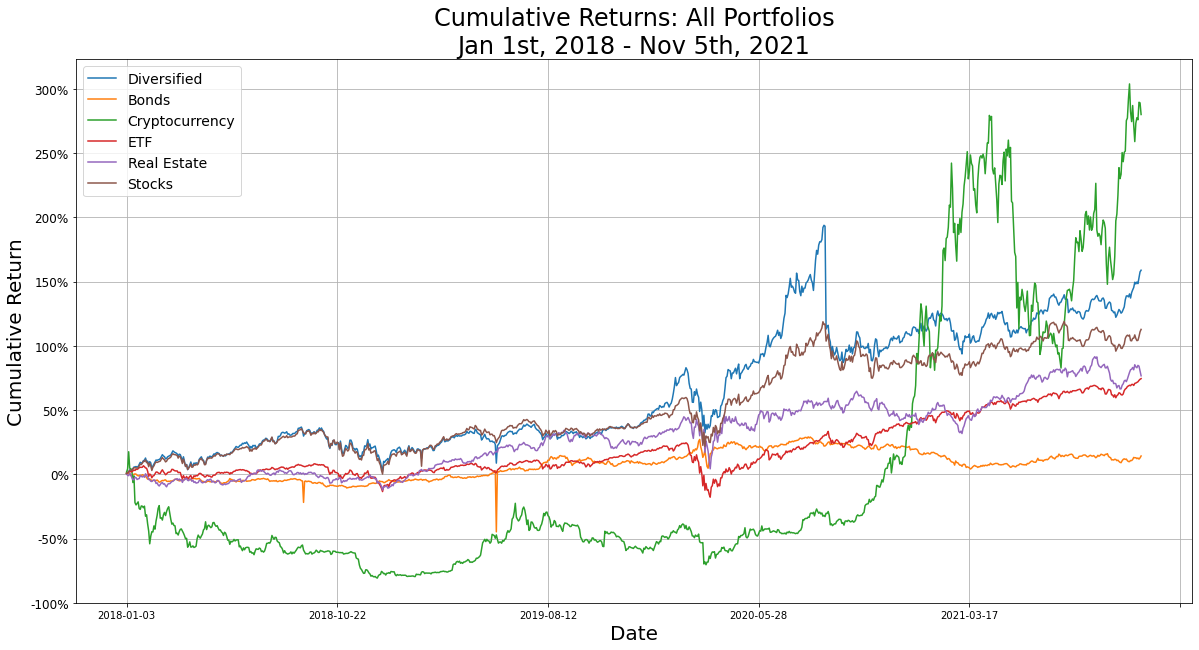

In [13]:
plot = portfolio_df.plot(title='Cumulative Returns: All Portfolios\n'
                                'Jan 1st, 2018 - Nov 5th, 2021',
                                figsize=(20,10),x='time')

#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Date', fontdict={'fontsize':20})
plot.set_ylabel('Cumulative Return', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})
plot.legend(['Diversified', 'Bonds', 'Cryptocurrency', 'ETF', 'Real Estate', 'Stocks'], 
    fontsize=14)

plot.grid()

## Retrieve and Prepare Average Return Data

In [63]:
stats_df = pd.read_csv(Path('../data/tabular_statistics_all.csv'),index_col=[0])
stats_df

,Cryptocurrency,Real Estate,ETF,Bonds,Stock,Diversified
sharpe_ratio,0.701950,0.732569,0.5276,0.3339,0.48700,0.83500
average_annual_return,0.444908,0.178209,0.2561,0.2123,0.15875,0.26173
annualized_std,0.633817,0.243265,0.4854,0.6358,0.32591,0.31337


In [64]:
avg_annual_return_df = stats_df.iloc[1,:]

In [65]:
avg_annual_return = stats_df.iloc[1,:].to_frame()
avg_annual_return.sort_values('average_annual_return',inplace=True)

In [66]:
avg_annual_return

,average_annual_return
Stock,0.158750
Real Estate,0.178209
Bonds,0.212300
ETF,0.256100
Diversified,0.261730
Cryptocurrency,0.444908


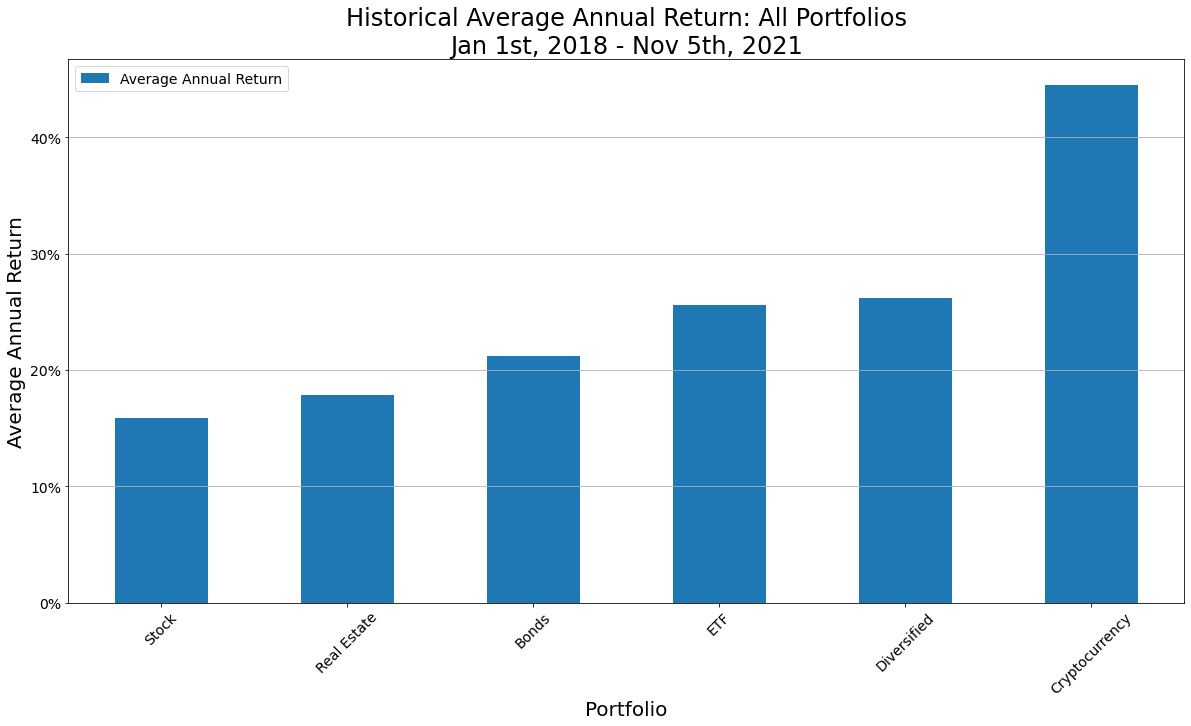

In [69]:
plot = avg_annual_return.plot.bar(title='Historical Average Annual Return: All Portfolios\n'
                                'Jan 1st, 2018 - Nov 5th, 2021', 
                                figsize=(20,10),rot=45)

#format the y-axis
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})
plot.set_xlabel('Portfolio', fontdict={'fontsize':20})
plot.set_ylabel('Average Annual Return', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':14})
plot.legend(['Average Annual Return'], 
    fontsize=14)
plot.tick_params(axis='x', labelsize='14')

plot.grid(axis='y')